# SMS Spam Detection Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk import word_tokenize, sent_tokenize, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.compose import ColumnTransformer
from IPython.display import display
from wordcloud import WordCloud
import pickle

In [2]:
sms_data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# This function provides all information about the dataset

def dataset_info(dataset):
    
    print("Information about dataset,")
    
    print(f"\n1. Dataset shape: {dataset.shape}")
    
    print(f"\n2. Dataset size: {dataset.size}")
    
    print(f"\n3. First 5 data:")
    display(dataset.head())
    
    print(f"\n4. Last 5 data:")
    display(dataset.tail())
    
    print(f"\n5. Random 10 data:")
    display(dataset.sample(10))
    
    print(f"\n6. All columns datatypes: \n\n{dataset.dtypes}")
    
    print(f"\n7. statistics values of dataset: ")
    display(dataset.describe())
    
    print(f"\n8. Total Null values: \n\n{dataset.isnull().sum()}")

    print(f"\n9. Total Duplicated values: {dataset.duplicated().sum()}")
    
    return

In [4]:
all_info = dataset_info(sms_data)
all_info

Information about dataset,

1. Dataset shape: (5572, 5)

2. Dataset size: 27860

3. First 5 data:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



4. Last 5 data:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN



5. Random 10 data:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1613,ham,Thnx dude. u guys out 2nite?,NaN,NaN,NaN
5110,spam,You have 1 new message. Please call 08715205273,NaN,NaN,NaN
4661,ham,Ladies first and genus second k .,NaN,NaN,NaN
4499,ham,Nvm take ur time.,NaN,NaN,NaN
683,spam,Hi I'm sue. I am 20 years old and work as a la...,NaN,NaN,NaN
4174,ham,How are you doing. How's the queen. Are you go...,NaN,NaN,NaN
742,ham,Just got up. have to be out of the room very s...,NaN,NaN,NaN
323,ham,That would be great. We'll be at the Guild. Co...,NaN,NaN,NaN
181,ham,Lol no. U can trust me.,NaN,NaN,NaN
691,ham,Sorry to trouble u again. Can buy 4d for my da...,NaN,NaN,NaN



6. All columns datatypes: 

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

7. statistics values of dataset: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2



8. Total Null values: 

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

9. Total Duplicated values: 403


## 1. Data cleaning

### Create a copy of the original dataset

In [5]:
df = sms_data.copy()
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3483,ham,Tell my bad character which u Dnt lik in me. ...,NaN,NaN,NaN
2649,ham,You might want to pull out more just in case a...,NaN,NaN,NaN
4486,ham,Miss call miss call khelate kintu opponenter m...,NaN,NaN,NaN
5526,spam,PRIVATE! Your 2003 Account Statement for shows...,NaN,NaN,NaN
1865,ham,Call to the number which is available in appoi...,NaN,NaN,NaN


### Remove unnecessary columns

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.columns

Index(['v1', 'v2'], dtype='object')

### Renaming the columns 


In [7]:
df.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Encoding target column

In [8]:
encoder = LabelEncoder()

In [9]:
df['Target'] = encoder.fit_transform(df['Target'])
df.sample(5)

,Target,Text
4768,0,watever reLation u built up in dis world only ...
1635,0,You have come into my life and brought the sun...
996,0,Yetunde i'm in class can you not run water on ...
845,0,Meanwhile in the shit suite: xavier decided to...
745,0,Dunno he jus say go lido. Same time 930.


In [10]:
df['Target'].value_counts()

Target
0    4825
1     747
Name: count, dtype: int64

### Checking null values

In [11]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

### Remove duplicated values

In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

## 2. Data Preprocessing


In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
ps = PorterStemmer()

In [17]:
def data_preprocessing(text):
    
    text = text.lower()
    text = word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [18]:
df['clean_text'] = df['Text'].apply(data_preprocessing)
df.head()

,Target,Text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do think he goe to usf he live around he...


### Create 'number of character' column

In [19]:
df['num_character'] = df['clean_text'].apply(len)
df.head()

,Target,Text,clean_text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,96
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,21
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,143
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,43
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do think he goe to usf he live around he...,55


In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/umangaj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Create 'number of word' column

In [21]:
df['clean_text'].apply(lambda x:word_tokenize(x))

0       [go, until, jurong, point, crazi, avail, onli,...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, in, 2, a, wkli, comp, to, win, f...
3       [u, dun, say, so, earli, hor, u, c, alreadi, t...
4       [nah, i, do, think, he, goe, to, usf, he, live...
                              ...                        
5567    [thi, is, the, 2nd, time, we, have, tri, 2, co...
5568                [will, b, go, to, esplanad, fr, home]
5569    [piti, wa, in, mood, for, that, so, ani, other...
5570    [the, guy, did, some, bitch, but, i, act, like...
5571                       [rofl, it, true, to, it, name]
Name: clean_text, Length: 5169, dtype: object

In [22]:
df['clean_text'].apply(lambda x:len(word_tokenize(x)))

0       20
1        6
2       30
3       11
4       13
        ..
5567    27
5568     7
5569    10
5570    26
5571     6
Name: clean_text, Length: 5169, dtype: int64

In [23]:
df['num_word'] = df['clean_text'].apply(lambda x:len(word_tokenize(x)))
df.head()

,Target,Text,clean_text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,96,20
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,21,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,143,30
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,43,11
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do think he goe to usf he live around he...,55,13


### Create 'number of sentence' column

In [24]:
df['clean_text'].apply(lambda x:len(sent_tokenize(x)))

0       1
1       1
2       1
3       1
4       1
       ..
5567    1
5568    1
5569    1
5570    1
5571    1
Name: clean_text, Length: 5169, dtype: int64

In [25]:
df['num_sentence'] = df['clean_text'].apply(lambda x:len(sent_tokenize(x)))
df.head()

,Target,Text,clean_text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,96,20,1
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,21,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...,143,30,1
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,43,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do think he goe to usf he live around he...,55,13,1


In [26]:
df.describe()

,Target,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,67.426968,14.952022,0.999033
std,0.332253,49.423266,10.701589,0.031089
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,7.000000,1.000000
50%,0.000000,52.000000,12.000000,1.000000
75%,0.000000,98.000000,21.000000,1.000000
max,1.000000,719.000000,162.000000,1.000000


## 3. Exploratory Data Analysis (EDA)


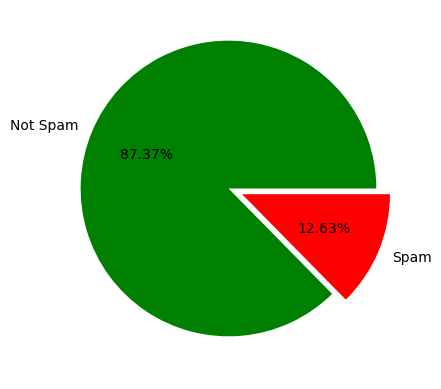

In [27]:
plt.pie(df['Target'].value_counts(), autopct='%0.2f%%', labels=['Not Spam', 'Spam'], explode=[0.1, 0], colors=['green', 'red'])
plt.show()

<AxesSubplot: xlabel='num_character', ylabel='Density'>

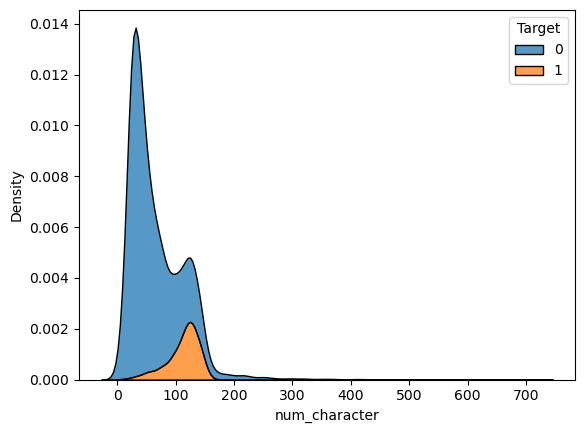

In [28]:
sns.kdeplot(x=df['num_character'], hue=df['Target'], multiple='stack')

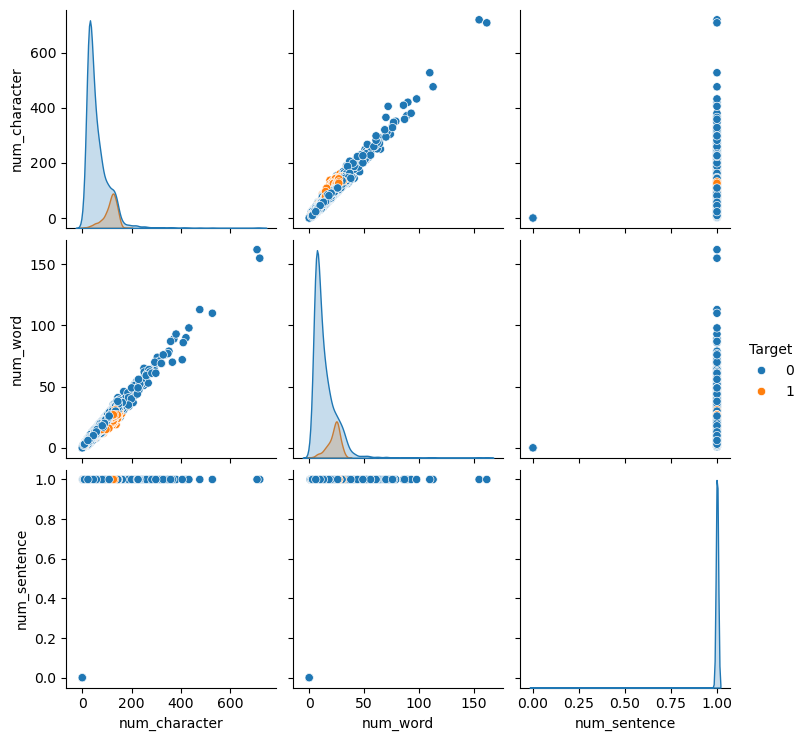

In [29]:
sns.pairplot(df, hue='Target')

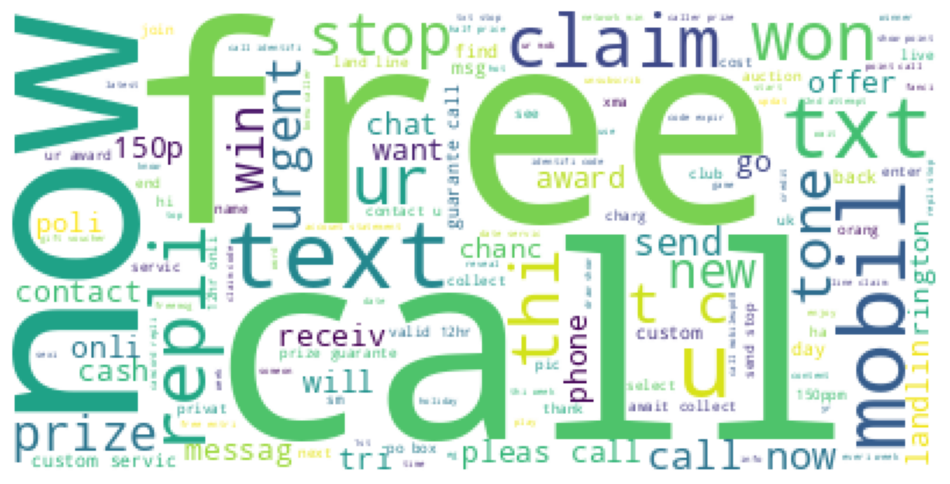

In [30]:
# The term spam is often used 

spam_word = df[df['Target']==1]['clean_text'].apply(lambda x:word_tokenize(x)).values

spam_word_list = []
for i in spam_word:
    spam_word_list.append(" ".join(i))

only_spam_word = " ".join(spam_word_list)

wordcloud = WordCloud(background_color="white").generate(only_spam_word)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 4. Model Building 


In [31]:
X = df.iloc[:,1]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


1. accuracy score of all models


,model_name,accuracy_score
0,SVM,0.978723
1,Logistic Regression,0.969697
2,Multinomial_NB,0.969697



2. Graphical representation of all model accuracy score


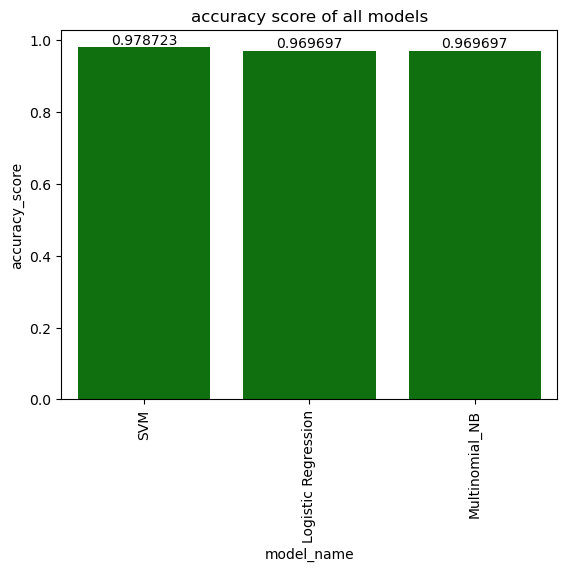

In [32]:
def all_in_one():
    
    tfidf = TfidfVectorizer(max_features=3000)
    svm = SVC(kernel='linear')
    lr = LogisticRegression()    
    mnb = MultinomialNB()

    balanced_bagging_classifier = BalancedBaggingClassifier(svm,
                                                        sampling_strategy='auto', 
                                                        replacement=False,
                                                        random_state=42)

    pipe_svm = Pipeline(steps=[('tfidf', tfidf), ('svm', balanced_bagging_classifier)])

    pipe_lr = Pipeline(steps=[('tfidf', tfidf), ('lr', lr)])

    pipe_mnb = Pipeline(steps=[('tfidf', tfidf), ('mnb', mnb)])
    
    pipe = [pipe_svm, pipe_lr, pipe_mnb]
    model_list = ['SVM', 'Logistic Regression', 'Multinomial_NB']
    
    model_score = []
    y_pred_list = []
    for i in range(len(pipe)):
        pipe[i].fit(X_train,y_train)
        y_pred = pipe[i].predict(X_test)
        model_score.append([model_list[i], accuracy_score(y_test, y_pred)])
        y_pred_list.append(y_pred)

    model_score_df = pd.DataFrame(model_score,columns=['model_name', 'accuracy_score'])
    print('\n1. accuracy score of all models')
    display(model_score_df)
    
    # Graphical representation of all model accuracy score
    print('\n2. Graphical representation of all model accuracy score')
    ax = sns.barplot(x=model_score_df['model_name'], y=model_score_df['accuracy_score'], color='green')
    plt.xticks(rotation='vertical')
    ax.bar_label(ax.containers[0])
    plt.title('accuracy score of all models')
    plt.show()
    
    return pipe, y_pred_list

all_info = all_in_one()

In [33]:
all_info

([Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                  ('svm',
                   BalancedBaggingClassifier(estimator=SVC(kernel='linear'),
                                             random_state=42))]),
  Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                  ('lr', LogisticRegression())]),
  Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                  ('mnb', MultinomialNB())])],
 [array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0])])

In [34]:
pipe_svm = all_info[0][0]
y_pred_svm = all_info[1][0]

In [35]:
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                ('svm',
                 BalancedBaggingClassifier(estimator=SVC(kernel='linear'),
                                           random_state=42))])

In [36]:
accuracy_score(y_test, y_pred_svm)

0.9787234042553191

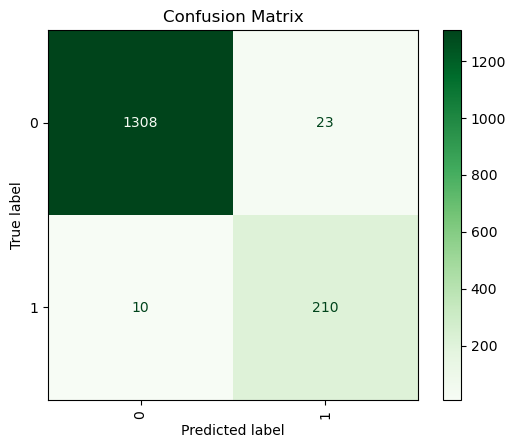

In [37]:
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels= list(df['Target'].unique()))
disp.plot(cmap = plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xticks(rotation='vertical')
plt.show()

In [38]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1331
           1       0.90      0.95      0.93       220

    accuracy                           0.98      1551
   macro avg       0.95      0.97      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [39]:
user_input = '''
Congratulations! 🎉 You've won a free iPhone 15! Click here to claim your prize: [malicious-link].  
'''

In [40]:
user_clean_input = data_preprocessing(user_input)
user_clean_input

'congratul you won a free iphon 15 click here to claim your prize'

In [41]:
prediction = pipe_svm.predict([user_clean_input])[0]
if prediction == 0:
    print('Not Spam')
else:
    print('Spam')

Spam


In [42]:
pickle.dump(pipe_svm, open('model.pkl', 'wb'))